<a href="https://colab.research.google.com/github/vimer3/Text_mining/blob/main/DATADIVAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Divas**

Matteo Fossati
Gianni Valena
Vimercati Alessandro

### Operation that is going to be performed

1. Data Exploratory Analysis

2. VADER

3. Neural Network approach

4. Transformer Based Approach

5. Compare the models

***

### Esplanation of the dataset and
reviews dataset from Yelp! for classification/sentiment analysis tasks

Column	Description
class_index	a number from 1 to 5
review	the text of the review

The Yelp reviews dataset consists of reviews from Yelp. It is extracted from the Yelp Dataset Challenge 2015 data.

The Yelp reviews full star dataset is constructed by Xiang Zhang [mailto:xiang.zhang@nyu.edu] from the above dataset. It is first used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).

The Yelp reviews full star dataset is constructed by randomly taking 130,000 training samples and 10,000 testing samples for each review star from 1 to 5. In total there are 650,000 trainig samples and 50,000 testing samples.
The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 2 columns in them, corresponding to class index (1 to 5) and review text. The review texts are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

train 650,000 | test 50,000


<img src="https://media.giphy.com/media/BpGWitbFZflfSUYuZ9/giphy.gif">

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import spacy
import re
import nltk
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
nltk.download('stopwords')
nltk.download('words')

import string
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## Loading train and test set

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/sentiment/train.csv', names=('rate','review'))


In [ ]:
test = pd.read_csv('/content/drive/My Drive/sentiment/test.csv',names=('rate','review') )


# **Data cleanining**   
We are going to perferm a light cleaning in which we are going to remove only the string that do not add any relevant information.

Applying this cleaning process we are going to create the column "review" that we will use for Vader, RNN based classification and Transformer Based Approach.




In [ ]:
train['Length'] = train['review'].apply(len)
length = train['Length'].sum()

In [ ]:
length

476011554

## Remove HTML sequences

In [ ]:
def clean_html(html):
    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [ ]:
train['review'] = train['review'].apply(clean_html)

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "http://lamestizamadison.wordpress.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "http://kristilynk.wordpress.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and f

In [ ]:
train['Length'] = train['review'].apply(len)
length_1 = train['Length'].sum()

print('HTML strings removed : ', length - length_1)


HTML strings removed :  248


In [ ]:
test['review'] = test['review'].apply(clean_html)

## Remove emoji
We decided to remove the emoji in this light initial cleaning because we find out that we have only two emoji in the all datase

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
train['review'] = train['review'].apply(remove_emojis)

In [ ]:
test['review'] = test['review'].apply(remove_emojis)

In [ ]:
train['Length'] = train['review'].apply(len)
length_2 = train['Length'].sum()

print('Emoji strings removed : ', length_1 - length_2)

Emoji strings removed :  0


## Remove URL:

In [ ]:
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

In [ ]:
train['review'] = train['review'].apply(remove_URL)

In [ ]:
test['review'] = test['review'].apply(remove_URL)


In [ ]:
train['Length'] = train['review'].apply(len)
length_3 = train['Length'].sum()

print('URL strings removed : ', length_2 - length_3)

URL strings removed :  377393


## Remove non printable characters

In [ ]:
def remove_non_printable(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

In [ ]:
train['review'] = train['review'].apply(remove_non_printable)

In [ ]:
test['review'] = test['review'].apply(remove_non_printable)

In [ ]:
train['Length'] = train['review'].apply(len)
length_4 = train['Length'].sum()

print('Non Printable characters removed : ', length_3 - length_4)

Non Printable characters removed :  4


## Remove extra white space

In [ ]:
def remove_extra_whitespaces_func(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [ ]:
train['review'] = train['review'].apply(remove_extra_whitespaces_func)

In [ ]:
test['review'] = test['review'].apply(remove_extra_whitespaces_func)

In [ ]:
train['Length'] = train['review'].apply(len)
length_5 = train['Length'].sum()

print('Extra space removed : ', length_4 - length_5)

Extra space removed :  1720787


# **Exploratory Data Analysis using Data Visualization tools**
Data Exploration is the first step in data analysis used to explore and visualize data to discover insights from the start or identify areas or models to explore.

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

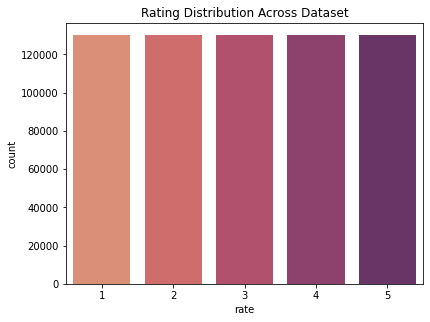

In [ ]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
sns.set_style(style=None, rc=None)
sns.countplot(data=train, x='rate', palette='flare').set_title('Rating Distribution Across Dataset')

From the above graph we can see that the train is perfectly balnced, having the same number of reviews for each Rate

In [ ]:
train['words_per_review'] = train['review'].str.split().apply(len)
n_words_list = train['words_per_review'].values.tolist()

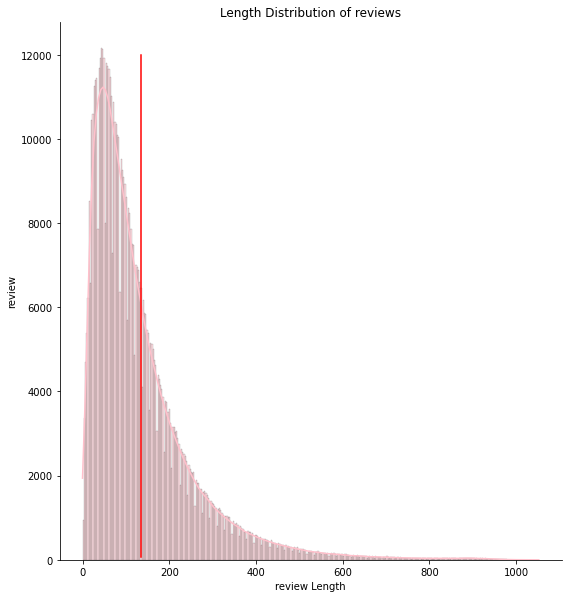

In [ ]:
word_mean = statistics.mean(n_words_list)
sns.displot(n_words_list, height = 8, kind = "hist", kde = True, color = "pink")
plt.title("Length Distribution of reviews")
plt.xlabel("review Length")
plt.ylabel("review")

plt.plot([word_mean, word_mean], [12000, 61], color = "red")
n_words_list = train['words_per_review'].values.tolist()

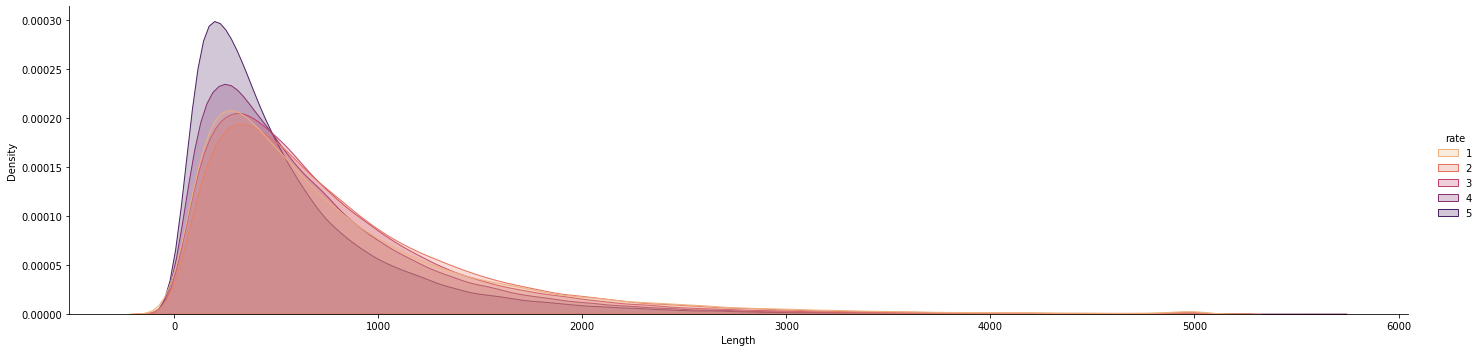

In [ ]:
sns.displot(data=train, x='Length', hue='rate', palette='flare', kind='kde', fill=True, aspect=4)

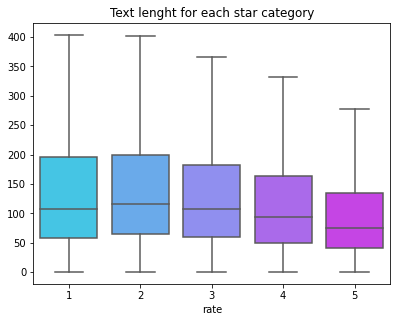

In [ ]:
sns.boxplot(x='rate',y='words_per_review', data=train, palette='cool', showfliers=False,);
plt.ylabel("")
plt.title('Text lenght for each star category');

***
This graphs allows us to visualize the distribution of the lenght of the reviews divided by rate. 5 stars rate reviews are usually shorter than all the others.
***

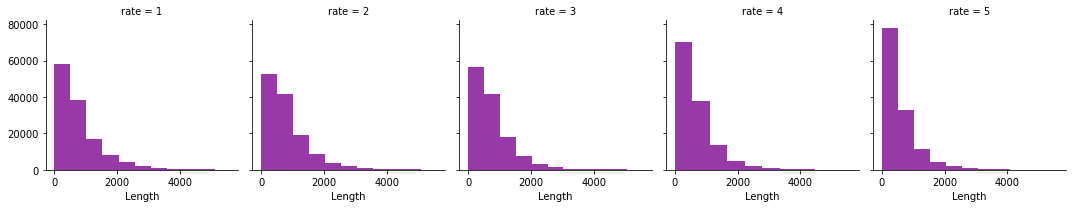

In [ ]:
g = sns.FacetGrid(data=train, col='rate')
g.map(plt.hist, 'Length', color='#973aa8')

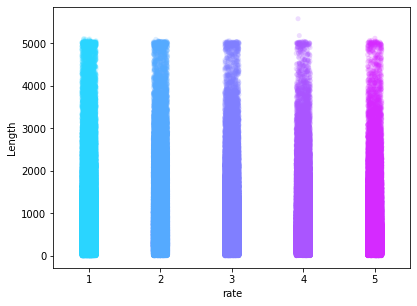

In [ ]:
sns.stripplot(data=train, x='rate', y='Length', palette='cool', alpha=0.2)

***
We can see that in general the negative reviews are a little bit longer that the positive ones

| Polarity | Mean Value of Review |
|----------|:--------------:|
| Negative | 151 |
| Positive | 114 |

***

# **Data Processing**
In this section we performe other addictional data cleaning operation to prepare the text for model classification.
***

## Lower case

In [ ]:
train['new_review'] = train['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['new_review'] = test['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Remove Punctuation

In [ ]:
# Let's now REMOVE PUNCTUATION
train['new_review'] = train['new_review'].str.replace('[^\w\s]','',regex=True)
test['new_review'] = test['new_review'].str.replace('[^\w\s]','',regex=True)

## Remove Numeric Values

In [ ]:
# define a function that removes NUMERIC VALUES and mixtures
def remove_num(text):
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

In [ ]:
train['new_review'] = train['new_review'].apply(remove_num)

In [ ]:
test['new_review'] = test['new_review'].apply(remove_num)

## Remove Stopwords

We deleted some words from the nltk stopword list in order to have more accurate results. Stopwords like "not" are significat in sentiemnt analysis so we decided to keep those in the text that we are going to processes in the classification.

In [ ]:
stop_light = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'co', 'could', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'latter', 'latterly', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone' , 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves',  'however']

In [ ]:
# REMOVE STOPWORDS
train['new_review'] = train['new_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_light))
test['new_review'] = test['new_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_light))

# Word Cloud
Word clouds are popular for visualizing qualitative data because they’re simple to use and provide quick insights of how topics are mentioned in our data.


In [ ]:
full_text = ' '.join(train['new_review'])

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_full = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<img src="https://media.giphy.com/media/26gJA86nNiY4a39Ze/giphy.gif">

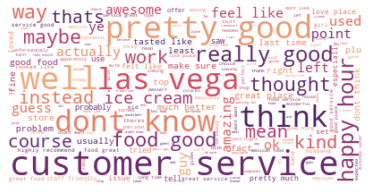

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string

cloud_no_stopword = WordCloud(background_color='white', colormap='flare' , stopwords=stop_full).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

## Lemming
Let's now create a Lemming function

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

#train['new_review'] = train['new_review'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))
#test['new_review'] = test['new_review'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))

/Users/alessandrp/opt/anaconda3/envs/text_mining/lib/python3.9/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Word cloud after Lemming

In [ ]:
full_text = ' '.join(train['new_review'])

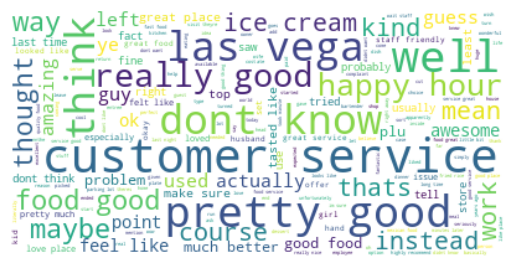

In [ ]:
from wordcloud import WordCloud
# concatenate all the reviews into one single string

cloud_stopword = WordCloud(background_color='white', stopwords=stop_full).generate(full_text)
plt.imshow(cloud_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bag of Words (BoW)
We may be also interested in how much exactly a word appeared across all the reviews, **Bag of Words** basically builds a list of words occurring within a collection of documents and keeps track of their frequencies.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import nltk
nltk.download('punkt')


lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in stop_full:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist_2 = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessandrp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dist_2.head()

,Word,Frequency
0,food,381717
1,good,377671
2,place,372203
3,like,312743
4,time,240898


# **Let's start modelling**

In this section we are to use basic classification models to see how they perform and compare this results with  more sofisticated RNN classifiers.

<img src="https://media.giphy.com/media/i3RA5wLyWjCRa/giphy.gif?cid=ecf05e471316as6qs35q071w9awymkxljruukduu8nai4w69&rid=giphy.gif&ct=g">

## Preparing Data

In [ ]:
x_train = train["new_review"]


In [ ]:
y_train = train['rate']

In [ ]:
x_test = test['new_review']

In [ ]:
y_test = test['rate']

## Initializing the models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('cv', CountVectorizer(stop_words=stop_light,ngram_range = (2,2),tokenizer = token.tokenize)),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

## Multinomial Naive Bayes

In this model we use Count Vectorizer at it performs better considering bigrams, in this sentiemnt analysis considering bigrams like "not good" can have a noticible impact.

In [ ]:
text_clf_nb.fit(x_train, y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(ngram_range=(2, 2),
                                 stop_words=['a', 'about', 'above', 'across',
                                             'after', 'afterwards', 'again',
                                             'against', 'all', 'almost',
                                             'alone', 'along', 'already',
                                             'also', 'although', 'always', 'am',
                                             'among', 'amongst', 'amoungst',
                                             'amount', 'an', 'and', 'another',
                                             'any', 'anyhow', 'anyone',
                                             'anything', 'anyway', 'anywhere', ...],
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('clf', MultinomialNB())])

In [ ]:
predictions = text_clf_nb.predict(x_test)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[6449 3081  345   82   43]
 [2089 5482 2132  245   52]
 [ 680 2420 5096 1592  212]
 [ 305  622 2789 4971 1313]
 [ 488  286  880 3541 4805]]


In [ ]:
cf = metrics.confusion_matrix(y_test,predictions)

In [ ]:
cfm = pd.DataFrame(cf)

[Text(0.5, 1.0, 'Naive Bayse')]

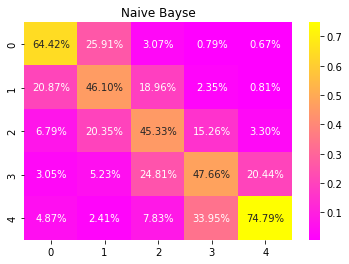

In [ ]:
sns.heatmap(cfm/np.sum(cfm), annot=True, fmt='.2%', cmap='spring').set(title='Naive Bayse')

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64     10000
           2       0.46      0.55      0.50     10000
           3       0.45      0.51      0.48     10000
           4       0.48      0.50      0.49     10000
           5       0.75      0.48      0.59     10000

    accuracy                           0.54     50000
   macro avg       0.56      0.54      0.54     50000
weighted avg       0.56      0.54      0.54     50000



In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.53606


## Linear SVC

In this other simple model we have noticed that tf-idf performs better.

In [ ]:
text_clf_lsvc.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
predictions = text_clf_lsvc.predict(x_test)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[7593 1767  333  112  195]
 [2742 4497 2003  468  290]
 [ 708 2161 4194 2198  739]
 [ 223  494 1892 4362 3029]
 [ 208  181  447 2089 7075]]


In [ ]:
cf = metrics.confusion_matrix(y_test,predictions)

[Text(0.5, 1.0, 'Linear SVC')]

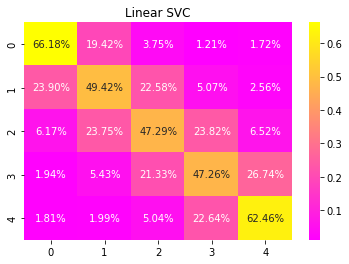

In [ ]:
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='spring').set(title='Linear SVC')

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.66      0.76      0.71     10000
           2       0.49      0.45      0.47     10000
           3       0.47      0.42      0.44     10000
           4       0.47      0.44      0.45     10000
           5       0.62      0.71      0.66     10000

    accuracy                           0.55     50000
   macro avg       0.55      0.55      0.55     50000
weighted avg       0.55      0.55      0.55     50000



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.55442


# **VADER**

Valence Aware Dictionary for sEntiment Reasoning is a model used for sentiment analysis on unlabeled data. The results obtained in this section are a benchmark for next models that will rely on RNN methods. We perform this analisys only on the test.  

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def lab(x):

    if x<3:
        x = 'neg'
    else:
        x = 'pos'
    return x

In [ ]:
test['label4VADER'] = test['rate'].apply(lab)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
test['scores'] = test['review'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
test['compound']  = test['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
test['comp_score'] = test['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [ ]:
test.head()

,rate,review,label4VADER,scores,compound,comp_score
0,1,I got 'new' tires from them and within two wee...,neg,"{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'comp...",-0.8951,neg
1,1,Don't waste your time. We had two different pe...,neg,"{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'comp...",0.3252,pos
2,1,All I can say is the worst! We were the only 2...,neg,"{'neg': 0.092, 'neu': 0.853, 'pos': 0.055, 'co...",-0.7697,neg
3,1,I have been to this restaurant twice and was d...,neg,"{'neg': 0.137, 'neu': 0.833, 'pos': 0.031, 'co...",-0.9645,neg
4,1,Food was NOT GOOD at all! My husband & I ate h...,neg,"{'neg': 0.13, 'neu': 0.825, 'pos': 0.044, 'com...",-0.9392,neg


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(test['label4VADER'],test['comp_score'])

0.74086

<img src= "https://media.giphy.com/media/l46C93LNM33JJ1SMw/giphy.gif">

In [ ]:
print(classification_report(train['label4VADER'],train['comp_score']))

              precision    recall  f1-score   support

         neg       0.84      0.43      0.57    260000
         pos       0.71      0.95      0.81    390000

    accuracy                           0.74    650000
   macro avg       0.78      0.69      0.69    650000
weighted avg       0.76      0.74      0.72    650000



In [ ]:
print(confusion_matrix(train['label4VADER'],train['comp_score']))

[[112218 147782]
 [ 21304 368696]]


[Text(0.5, 1.0, 'VADER')]

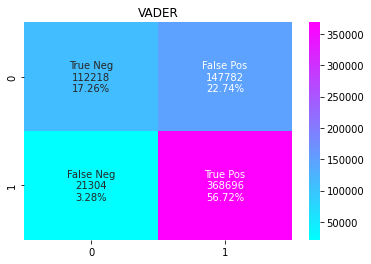

In [ ]:
cf=confusion_matrix(train['label4VADER'],train['comp_score'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='cool').set(title='VADER')

# **RECURSIVE NEURAL NETWORK**

## Libraries

In [ ]:
!pip install seqeval

import keras
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from tensorflow.keras.layers import Embedding
from keras.models import Model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D, GRU, SimpleRNN
from keras.layers.core import Dense, Activation, Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=54328d1ec9096c3dcdc12ae609115f1047b4cf65ce4fc5fb847032cd4f43a473
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


## WORD EMBEDDING

 GloVe will be applied as  word embedding technique to emphasize co-occurrences of words.
 Even if word2vec should faster and esier to impelment we decide to use GloVe in order to mantain some relevant information included in the text.

In [ ]:
x_train =  train['new_review']
x_test = test['new_review']

In [ ]:
y_train_d = pd.get_dummies(train['rate']).values
y_test_d = pd.get_dummies(test['rate']).values

In [ ]:
tokenizer = Tokenizer(num_words = 10000) #anche se il numero sarà sicuramnete maggiore il tokenizer prenderà in considerazione solo i 10000 più frequenti

tokenizer.fit_on_texts(x_train) #.values = array con solo le recensioni separate da una virgola

In [ ]:
len(tokenizer.word_index) #numero di token

764540

In [ ]:


x_train = tokenizer.texts_to_sequences(x_train) #Tokenizer of TRAIN
x_test = tokenizer.texts_to_sequences(x_test) #Tokenizer of TEST

In [ ]:

# Find out how the lenght of the review is distributed

sequence_len = np.array([len(s) for s in x_train])
print([(str(new_p) + '%', np.percentile(sequence_len, new_p)) for new_p in range(75,101, 5)])

[('75%', 175.0), ('80%', 200.0), ('85%', 233.0), ('90%', 281.0), ('95%', 368.0), ('100%', 1040.0)]


In [ ]:
max_len = 368 #max length for the embedding

x_train_pad = pad_sequences(x_train, padding = 'post', maxlen = max_len)
x_test_pad = pad_sequences(x_test , padding = 'post', maxlen = max_len)

In [ ]:
embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/sentiment/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## LSTM

In [ ]:
model_LSTM_uni = Sequential([
    Embedding(vocab_size, #how many unique words are rapresented
              100, #every word will be mapped in a vector of lenght 100
              weights=[embedding_matrix], #initial weights calculated with Glove
              input_length=max_len, #set the max length of the vectors for embedding
              trainable =False),  # with False prevent the weights from being updated during training
    SpatialDropout1D(0.2), #remove 20% of random elements to avoid overfitting, it remove not only the element but the entire map(different from droput)
    LSTM(100), #combining LSTM layers from both directions instead of only a direction like LSTM.
    Dense(5, activation = 'softmax') #softmax works well for multiclassification
])

model_LSTM_uni.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_LSTM_uni.summary())



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 368, 100)          76454100  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 368, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 76,535,005
Trainable params: 80,905
Non-trainable params: 76,454,100
_________________________________________________________________
None


In [ ]:
model_LSTM_uni.fit(x_train_pad, y_train_d, batch_size = 64, epochs = 5, verbose = 1,validation_split=0.2)

Epoch 1/5
8125/8125 [==============================] - 138s 17ms/step - loss: 1.5579 - accuracy: 0.2426 - val_loss: 1.1488 - val_accuracy: 0.5031
Epoch 2/5
8125/8125 [==============================] - 136s 17ms/step - loss: 1.0744 - accuracy: 0.5266 - val_loss: 0.9442 - val_accuracy: 0.5891
Epoch 3/5
8125/8125 [==============================] - 136s 17ms/step - loss: 1.0012 - accuracy: 0.5588 - val_loss: 0.9036 - val_accuracy: 0.6068
Epoch 4/5
8125/8125 [==============================] - 135s 17ms/step - loss: 0.9752 - accuracy: 0.5698 - val_loss: 0.8804 - val_accuracy: 0.6167
Epoch 5/5
8125/8125 [==============================] - 135s 17ms/step - loss: 0.9595 - accuracy: 0.5772 - val_loss: 0.8706 - val_accuracy: 0.6232


In [ ]:
score_LSTM_uni = model_LSTM_uni.evaluate(x_test_pad,y_test_d,verbose=1)

1563/1563 [==============================] - 12s 8ms/step - loss: 0.9299 - accuracy: 0.5912


In [ ]:
import urllib
import sklearn
import logging
import os
import numpy as np
from seqeval.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions_LSTM_uni = model_LSTM_uni.predict(x_test_pad)
prediction_classes_LSTM_uni=np.argmax(predictions_LSTM_uni,axis=1)

1563/1563 [==============================] - 10s 6ms/step


In [ ]:

cd_LSTM_uni = print(classification_report(y_test_d.argmax(axis=1),prediction_classes_LSTM_uni))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73     10000
           1       0.51      0.55      0.53     10000
           2       0.55      0.41      0.47     10000
           3       0.53      0.46      0.49     10000
           4       0.66      0.73      0.69     10000

    accuracy                           0.59     50000
   macro avg       0.58      0.59      0.58     50000
weighted avg       0.58      0.59      0.58     50000



In [ ]:
cm_df = pd.DataFrame(cf_matrix)

[Text(0.5, 1.0, 'LSTM')]

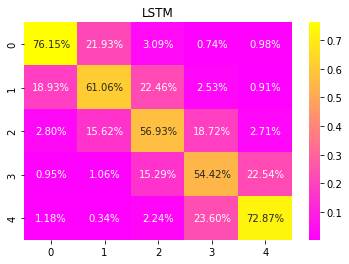

In [ ]:
sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%', cmap='spring').set(title='LSTM')

## BiLSTM without Stopwords
 As we are dealing with a large amount of data we start  implementing a bidarectional LSTM, to avoid lose information of the first inputs.
 Generally for sentiment analysis is suggested to remove stopwords but in our case the loss of information due to this process is too high, so we procede to perform again the BiLSTM including stopwords.

In [ ]:
model_LSTM = Sequential([
    Embedding(vocab_size, #how many unique words are rapresented
              100, #every word will be mapped in a vector of lenght 100
              weights=[embedding_matrix], #initial weights calculated with Glove
              input_length=max_len, #set the max length of the vectors for embedding
              trainable =False),  # with False prevent the weights from being updated during training
    SpatialDropout1D(0.2), #remove 20% of random elements to avoid overfitting, it remove not only the element but the entire map(different from droput)
    Bidirectional(LSTM(100)), #combining LSTM layers from both directions instead of only a direction like LSTM.
    Dense(5, activation = 'softmax') #softmax works well for multiclassification
])

model_LSTM.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_LSTM.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 368, 100)          76454100  
                                                                 
 spatial_dropout1d (SpatialD  (None, 368, 100)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 1005      
                                                                 
Total params: 76,615,905
Trainable params: 161,805
Non-trainable params: 76,454,100
_________________________________________________________________
None


In [ ]:
history_LSTM = model_LSTM.fit(x_train_pad, y_train_d, batch_size = 64, epochs = 10, verbose = 1,validation_split=0.2)

Epoch 1/10
8125/8125 [==============================] - 253s 30ms/step - loss: 1.1009 - accuracy: 0.5151 - val_loss: 0.9361 - val_accuracy: 0.5903
Epoch 2/10
8125/8125 [==============================] - 244s 30ms/step - loss: 0.9957 - accuracy: 0.5611 - val_loss: 0.8905 - val_accuracy: 0.6144
Epoch 3/10
8125/8125 [==============================] - 245s 30ms/step - loss: 0.9673 - accuracy: 0.5744 - val_loss: 0.8733 - val_accuracy: 0.6211
Epoch 4/10
8125/8125 [==============================] - 245s 30ms/step - loss: 0.9597 - accuracy: 0.5783 - val_loss: 0.8668 - val_accuracy: 0.6225
Epoch 5/10
8125/8125 [==============================] - 247s 30ms/step - loss: 0.9449 - accuracy: 0.5844 - val_loss: 0.8627 - val_accuracy: 0.6253
Epoch 6/10
8125/8125 [==============================] - 247s 30ms/step - loss: 0.9379 - accuracy: 0.5868 - val_loss: 0.8560 - val_accuracy: 0.6261
Epoch 7/10
8125/8125 [==============================] - 247s 30ms/step - loss: 0.9402 - accuracy: 0.5865 - val_loss: 0

In [ ]:
score = model_LSTM.evaluate(x_test_pad,y_test_d,verbose=1)

1563/1563 [==============================] - 22s 14ms/step - loss: 0.9071 - accuracy: 0.5979


## BiLSTM  

In [ ]:
model = Sequential([
    Embedding(vocab_size, #how many unique words are rapresented
              100, #every word will be mapped in a vector of lenght 100
              weights=[embedding_matrix], #initial weights calculated with Glove
              input_length=max_len, #set the max length of the vectors for embedding
              trainable =False),  # with False prevent the weights from being updated during training
    SpatialDropout1D(0.2), #remove 20% of random elements to avoid overfitting, it remove not only the element but the entire map(different from droput)
    Bidirectional(LSTM(100)), #combining LSTM layers from both directions instead of only a direction like LSTM.
    Dense(5, activation = 'softmax') #softmax works well for multiclassification
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 368, 100)          26399300  
                                                                 
 spatial_dropout1d (SpatialD  (None, 368, 100)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 1005      
                                                                 
Total params: 26,561,105
Trainable params: 161,805
Non-trainable params: 26,399,300
_________________________________________________________________
None


In [ ]:
model.fit(x_train_pad, y_train_d, batch_size = 64, epochs = 10, verbose = 1,validation_split=0.2)

Epoch 1/10
8125/8125 [==============================] - 246s 30ms/step - loss: 0.9005 - accuracy: 0.6029 - val_loss: 0.8055 - val_accuracy: 0.6484
Epoch 2/10
8125/8125 [==============================] - 253s 31ms/step - loss: 0.8800 - accuracy: 0.6126 - val_loss: 0.7833 - val_accuracy: 0.6603
Epoch 3/10
8125/8125 [==============================] - 250s 31ms/step - loss: 0.8661 - accuracy: 0.6190 - val_loss: 0.7844 - val_accuracy: 0.6585
Epoch 4/10
8125/8125 [==============================] - 247s 30ms/step - loss: 0.8569 - accuracy: 0.6238 - val_loss: 0.7943 - val_accuracy: 0.6540
Epoch 5/10
8125/8125 [==============================] - 248s 31ms/step - loss: 0.8497 - accuracy: 0.6269 - val_loss: 0.7788 - val_accuracy: 0.6625
Epoch 6/10
8125/8125 [==============================] - 248s 30ms/step - loss: 0.8420 - accuracy: 0.6306 - val_loss: 0.7954 - val_accuracy: 0.6518
Epoch 7/10
8125/8125 [==============================] - 248s 31ms/step - loss: 0.8364 - accuracy: 0.6330 - val_loss: 0

In [ ]:
score = model.evaluate(x_test_pad,y_test_d,verbose=1)

1563/1563 [==============================] - 22s 14ms/step - loss: 0.8286 - accuracy: 0.6398


In [ ]:
import urllib
import sklearn
import logging
import os
import numpy as np
from seqeval.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions = model.predict(x_test_pad)
prediction_classes=np.argmax(predictions,axis=1)

1563/1563 [==============================] - 20s 12ms/step


In [ ]:
cf_matrix = confusion_matrix(y_test_d.argmax(axis=1),prediction_classes)
print(classification_report(y_test_d.argmax(axis=1),prediction_classes))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     10000
           1       0.61      0.54      0.57     10000
           2       0.57      0.60      0.58     10000
           3       0.54      0.60      0.57     10000
           4       0.73      0.70      0.71     10000

    accuracy                           0.64     50000
   macro avg       0.64      0.64      0.64     50000
weighted avg       0.64      0.64      0.64     50000



In [ ]:
cm_df = pd.DataFrame(cf_matrix)

[Text(0.5, 1.0, 'LSTM')]

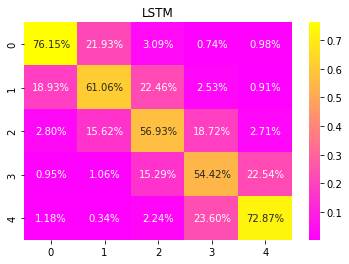

In [ ]:
sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.2%', cmap='spring').set(title='LSTM')

## GRU

In [ ]:
model_GRU = Sequential([
    Embedding(vocab_size, 100,  weights=[embedding_matrix], input_length=max_len, trainable =False),
    SpatialDropout1D(0.2),
    GRU(100),
    Dense(5, activation = 'softmax')
])

model_GRU.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_GRU.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 368, 100)          26399300  
                                                                 
 spatial_dropout1d (SpatialD  (None, 368, 100)         0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 26,460,405
Trainable params: 61,105
Non-trainable params: 26,399,300
_________________________________________________________________
None


In [ ]:
model_GRU.fit(x_train_pad, y_train_d, batch_size = 64, epochs = 5, verbose = 1,validation_split=0.2)

Epoch 1/5
8125/8125 [==============================] - 141s 17ms/step - loss: 1.2825 - accuracy: 0.4042 - val_loss: 0.9124 - val_accuracy: 0.6029
Epoch 2/5
8125/8125 [==============================] - 134s 17ms/step - loss: 0.9599 - accuracy: 0.5762 - val_loss: 0.8381 - val_accuracy: 0.6366
Epoch 3/5
8125/8125 [==============================] - 134s 16ms/step - loss: 0.9196 - accuracy: 0.5950 - val_loss: 0.8214 - val_accuracy: 0.6391
Epoch 4/5
8125/8125 [==============================] - 134s 16ms/step - loss: 0.8993 - accuracy: 0.6045 - val_loss: 0.8157 - val_accuracy: 0.6442
Epoch 5/5
8125/8125 [==============================] - 133s 16ms/step - loss: 0.8869 - accuracy: 0.6108 - val_loss: 0.7921 - val_accuracy: 0.6564


In [ ]:
score_GRU = model_GRU.evaluate(x_test_pad,y_test_d,verbose=1)

1563/1563 [==============================] - 12s 7ms/step - loss: 0.8477 - accuracy: 0.6282


In [ ]:
predictions_GRU = model_GRU.predict(x_test_pad)
prediction_classes_GRU =np.argmax(predictions_GRU,axis=1)

1563/1563 [==============================] - 10s 6ms/step


In [ ]:
x_GRU = confusion_matrix(y_test_d.argmax(axis=1),prediction_classes_GRU)
cf_matrix_GRU = print(classification_report(y_test_d.argmax(axis=1),prediction_classes_GRU))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     10000
           1       0.58      0.59      0.58     10000
           2       0.57      0.54      0.55     10000
           3       0.54      0.55      0.54     10000
           4       0.71      0.72      0.71     10000

    accuracy                           0.63     50000
   macro avg       0.63      0.63      0.63     50000
weighted avg       0.63      0.63      0.63     50000



## Binary classification with BiLSTM
We diveide the reviews in positive and negative and perform BiLSTM. this allows us to compare the model with Vader and see if is possible to increse the accuracy of the analysis reducing the number of classes.  

In [ ]:
def lab(x):

    if x<3:
        x = 0 # Negative
    else:
        x = 1 # Positive
    return x

In [ ]:
train['label'] = train['rate'].apply(lab)

In [ ]:
test['label'] = test['rate'].apply(lab)

In [ ]:
y_train_d_binary = train['label']

In [ ]:
y_test_d_binary = test['label']

In [ ]:
model_Binary = Sequential([
    Embedding(vocab_size, 100,  weights=[embedding_matrix], input_length=max_len, trainable = False),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(100)),
    Dense(1, activation = 'sigmoid')
])

model_Binary.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_Binary.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 368, 100)          26399300  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 368, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 26,560,301
Trainable params: 161,001
Non-trainable params: 26,399,300
_________________________________________________________________
None


In [ ]:
model_Binary.fit(x_train_pad, y_train_d_binary, batch_size = 64, epochs = 5, verbose = 1,validation_split=0.2)

Epoch 1/5
8125/8125 [==============================] - 255s 31ms/step - loss: 0.3698 - accuracy: 0.8300 - val_loss: 0.2743 - val_accuracy: 0.8796
Epoch 2/5
8125/8125 [==============================] - 251s 31ms/step - loss: 0.2993 - accuracy: 0.8680 - val_loss: 0.2459 - val_accuracy: 0.8934
Epoch 3/5
8125/8125 [==============================] - 253s 31ms/step - loss: 0.2792 - accuracy: 0.8778 - val_loss: 0.2351 - val_accuracy: 0.8984
Epoch 4/5
8125/8125 [==============================] - 256s 31ms/step - loss: 0.2655 - accuracy: 0.8844 - val_loss: 0.2343 - val_accuracy: 0.8991
Epoch 5/5
8125/8125 [==============================] - 252s 31ms/step - loss: 0.2580 - accuracy: 0.8881 - val_loss: 0.2243 - val_accuracy: 0.9039


In [ ]:
score_Binary = model_Binary.evaluate(x_test_pad,y_test_d_binary,verbose=1)

1563/1563 [==============================] - 21s 14ms/step - loss: 0.2457 - accuracy: 0.8942


In [ ]:
y_pred = model_Binary.predict(x_test_pad)

prediction_classes_Binary=[]
for i in range(len(y_pred)):
  if y_pred[i]>= 0.5:
    prediction_classes_Binary.append(1)
  else:
    prediction_classes_Binary.append(0)

1563/1563 [==============================] - 19s 12ms/step


In [ ]:
cf_matrix_Binary = print(classification_report(y_test_d_binary,prediction_classes_Binary))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     20000
           1       0.90      0.92      0.91     30000

    accuracy                           0.89     50000
   macro avg       0.89      0.89      0.89     50000
weighted avg       0.89      0.89      0.89     50000



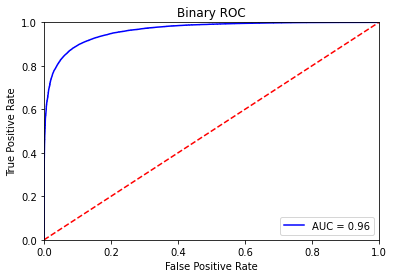

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Binary ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc_curve(y_test_d_binary,y_pred)

# **Transformer based approch**

In this last section we use  DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.
[source](https://huggingface.co/docs/transformers/model_doc/distilbert)

## Preparing the data and finetuning the model

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch

In [ ]:
!pip install -q transformers datasets

     |████████████████████████████████| 5.8 MB 4.6 MB/s 
     |████████████████████████████████| 452 kB 85.8 MB/s 
     |████████████████████████████████| 7.6 MB 72.7 MB/s 
     |████████████████████████████████| 182 kB 85.7 MB/s 
     |████████████████████████████████| 132 kB 86.1 MB/s 
     |████████████████████████████████| 212 kB 91.5 MB/s 
     |████████████████████████████████| 127 kB 91.5 MB/s 


In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
#Splitting the train dataset
len(train)

650000

In [ ]:
btrain = train.rename(columns = {'rate' : 'label', 'Review' : 'review'})
btest =  test.rename(columns = {'rate' : 'label', 'Review' : 'review'})

btrain = train[['rate', 'review']][:600000]
bvalidation = train[['rate', 'review']][600000:]
btest = test[['rate', 'review']]

In [ ]:
#Trasform into dummies variable
btrain= pd.get_dummies(btrain, columns = ['rate'])
bvalidation= pd.get_dummies(bvalidation, columns = ['rate'])
btest= pd.get_dummies(btest, columns = ['rate'])

In [ ]:
type(btrain)

pandas.core.frame.DataFrame

In [ ]:
btrain = btrain.rename(columns = {'rate_1' : '1', 'rate_2': '2', 'rate_3' : '3', 'rate_4' : '4', 'rate_5' : '5'})
bvalidation = bvalidation.rename(columns = {'rate_1' : '1', 'rate_2': '2', 'rate_3' : '3', 'rate_4' : '4', 'rate_5' : '5'})
btest = btest.rename(columns = {'rate_1' : '1', 'rate_2': '2', 'rate_3' : '3', 'rate_4' : '4', 'rate_5' : '5'})

In [ ]:
train = Dataset.from_pandas(btrain)
validation = Dataset.from_pandas(bvalidation)
test = Dataset.from_pandas(btest)

In [ ]:
# Costruction of the dataset, thta will be the input of BERT
#it must be a dictionary
dataset = DatasetDict({"train" : train, "validation" : validation, "test" : test})

In [ ]:
print(dataset)
#we can try to print an example
example = dataset['train'][3000]
example

DatasetDict({
    train: Dataset({
        features: ['review', '1', '2', '3', '4', '5'],
        num_rows: 600000
    })
    validation: Dataset({
        features: ['review', '1', '2', '3', '4', '5'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['review', '1', '2', '3', '4', '5'],
        num_rows: 50000
    })
})


{'review': 'In the mood for pizza and salad so decided to try Ephesus Pizza. I was given a menu from the hotel. First the plus - large menu with unique items (Gyro meat on a pizza). Now the important stuff: Lots of choices for their pizzas. Their crust has medium thickness. The taste: OK but nothing great. The salad was OK. Delivery service was very quick. \\n\\nWill not be a repeat customer.',
 '1': 0,
 '2': 0,
 '3': 1,
 '4': 0,
 '5': 0}

In [ ]:
# We have now to create that contains all the labes
labels = [label for label in dataset['train'].features.keys() if label not in ['review']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels


['1', '2', '3', '4', '5']

In [ ]:
#We have to create the typoly of input that BERT require

from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["review"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()

  return encoding

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

  0%|          | 0/600 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [ ]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'attention_mask', 'labels'])


In [ ]:
tokenizer.decode(example['input_ids'])

"[CLS] dr. goldberg offers everything i look for in a general practitioner. he's nice and easy to talk to without being patronizing ; he's always on time in seeing his patients ; he's affiliated with a top - notch hospital ( nyu ) which my parents have explained to me is very important in case something happens and you need surgery ; and you can get referrals to see specialists without having to see him first. really, what more do you need? i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"

In [ ]:
example['labels']

[0.0, 0.0, 0.0, 0.0, 1.0]

In [ ]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['5']

In [ ]:
encoded_dataset.set_format("torch")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [ ]:
batch_size = 64
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"distilbert-base-uncased-finetuned-sst-2-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch


def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [ ]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [ ]:
encoded_dataset['train']['input_ids'][0]

tensor([  101,  2852,  1012, 18522,  4107,  2673,  1045,  2298,  2005,  1999,
         1037,  2236, 18742,  1012,  2002,  1005,  1055,  3835,  1998,  3733,
         2000,  2831,  2000,  2302,  2108,  9161,  6026,  1025,  2002,  1005,
         1055,  2467,  2006,  2051,  1999,  3773,  2010,  5022,  1025,  2002,
         1005,  1055,  6989,  2007,  1037,  2327,  1011, 18624,  2902,  1006,
        27935,  1007,  2029,  2026,  3008,  2031,  4541,  2000,  2033,  2003,
         2200,  2590,  1999,  2553,  2242,  6433,  1998,  2017,  2342,  5970,
         1025,  1998,  2017,  2064,  2131,  6523,  7941,  2015,  2000,  2156,
        15744,  2302,  2383,  2000,  2156,  2032,  2034,  1012,  2428,  1010,
         2054,  2062,  2079,  2017,  2342,  1029,  1045,  1005,  1049,  3564,
         2182,  2667,  2000,  2228,  1997,  2151, 10821,  1045,  2031,  2055,
         2032,  1010,  2021,  1045,  1005,  1049,  2428,  5059,  1037,  8744,
         1012,   102,     0,     0,     0,     0,     0,     0])

In [ ]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.6958, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[ 0.0970, -0.0251,  0.0386,  0.0249,  0.1155]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

## Results

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 600000
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 46875
  Number of trainable parameters = 66957317
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.294000,0.262749,0.665449,0.778487,0.611320
2,0.275900,0.259664,0.672769,0.784065,0.627260
3,0.256100,0.262941,0.680335,0.792578,0.649980
4,0.238400,0.271247,0.678578,0.793395,0.655300
5,0.228200,0.277039,0.675517,0.791932,0.653820


***** Running Evaluation *****
  Num examples = 50000
  Batch size = 64
Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english/checkpoint-9375
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english/checkpoint-9375/config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english/checkpoint-9375/pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-sst-2-english/checkpoint-9375/tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-sst-2-english/checkpoint-9375/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 64
Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english/checkpoint-18750
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english/checkpoint-18750/config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english/checkpoint-18750/pytorch_model.bin
tokenizer config file saved i

TrainOutput(global_step=46875, training_loss=0.26213076334635416, metrics={'train_runtime': 8764.9533, 'train_samples_per_second': 342.272, 'train_steps_per_second': 5.348, 'total_flos': 9.935586432e+16, 'train_loss': 0.26213076334635416, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 50000
  Batch size = 64


{'eval_loss': 0.2629408836364746,
 'eval_f1': 0.680335410480532,
 'eval_roc_auc': 0.7925775,
 'eval_accuracy': 0.64998,
 'eval_runtime': 54.6388,
 'eval_samples_per_second': 915.1,
 'eval_steps_per_second': 14.312,
 'epoch': 5.0}

<img src="https://media.giphy.com/media/7daGnHQsteMjQHVQKi/giphy.gif">

# **Comparing the results and final considerations**

In [ ]:
lst = [[None,None,0.68,0.65,0.792],[0.58,0.59,0.58,0.59,None],[0.64,0.64,0.64,0.64,None],[0.63,0.63,0.63,0.63,None],[0.56,0.54,0.54,0.536,None],[0.55,0.55,0.55,0.55,None],[0.89,0.89,0.89,0.89,0.96],[0.76,0.74,0.72,0.74,None]]
df_compare_models = pd.DataFrame(lst, columns = ['Precision','Recall','F1-score','Accuracy','ROC'])
df_compare_models.index = ['DistilBERT','LSTM','BiLSTM', 'GRU','MNB','LinearSVC' ,'Binary','VADER']

In [ ]:
df_compare_models

,Precision,Recall,F1-score,Accuracy,ROC
DistilBERT,NaN,NaN,0.68,0.650,0.792
LSTM,0.58,0.59,0.58,0.590,NaN
BiLSTM,0.64,0.64,0.64,0.640,NaN
GRU,0.63,0.63,0.63,0.630,NaN
MNB,0.56,0.54,0.54,0.536,NaN
LinearSVC,0.55,0.55,0.55,0.550,NaN
Binary,0.89,0.89,0.89,0.890,0.960
VADER,0.76,0.74,0.72,0.740,NaN


First, from the table above we can see a marked improvement in all metric values due to the transition from LSTM to BiLSTM.

Moreover, our BiLSTM with the choosen activation function had the best performance among those considered and almost reached DistilBERT. With the same activation function GRU is just slightly worse than BiLSTM.  

The performance of models implemented without neural networks is fairly similar to each other but significantly inferior to models with neural networks.

While looking at the Binary classification models the same LSTM model used before predicts the sentiment better than VADER.